In [ ]:
import torch
import torchaudio
import torchaudio.transforms as transforms
import torch.nn as nn

In [ ]:
audio_path = "colorofsky.wav"
waveform, sample_rate = torchaudio.load(audio_path)
print(waveform)
print(sample_rate)

# output: waveform(pytorch tensor representing audio signals)(channels, time_samples)
# sample_rate(an integer representing sampling rate of an audio)

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0090, -0.0098, -0.0111],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0032, -0.0009,  0.0003]])
48000


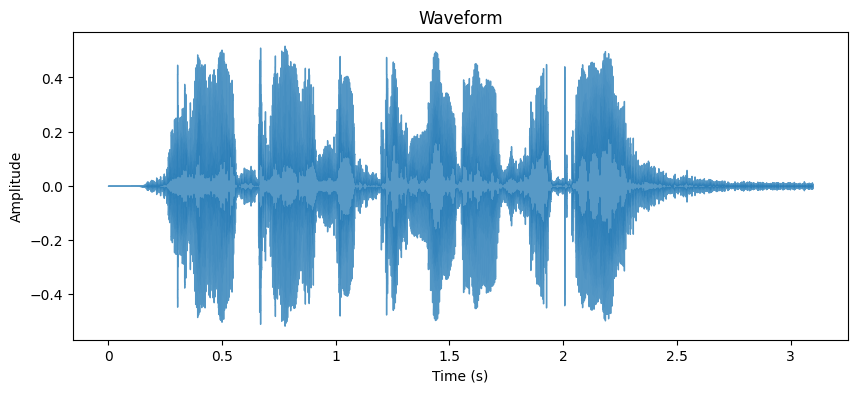

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.75)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

In [ ]:
if sample_rate != 22050:
  resample = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=22050)
  waveform = resample(waveform)

In [ ]:
# Mel-spectogram: frequency representation of audio

mel_spec_transform = transforms.MelSpectrogram(
    sample_rate = 22050,
    # sample_rate = 16000,
    n_fft = 512,
    # n_fft = 400,
    hop_length = 128,
    # hop_length = 160,
    n_mels = 100
    # n_mels = 80
)
mel_spec = mel_spec_transform(waveform)
mel_spec

# output: mel_spec.shape = (,channels, n_mels, Time frames) , time = (samples/hop_length) ~ 100 for 1 sec

/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (100) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  warnings.warn(


tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.6761e-03,
          1.4297e-02, 4.4708e-02],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 7.4809e-04,
          2.2872e-03, 7.1525e-03],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.5553e-05,
          4.0646e-05, 5.1043e-05],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.7738e-05,
          2.6196e-05, 3.1465e-05],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.8453e-05,
          2.3331e-05, 2.9499e-05]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.3610e-03,
          1.7370e-02, 4.6787e-02],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 8.5766e-04,
          2.7788e-03, 7.4852e-03],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.6657e-05,
          2.754

In [ ]:
# amplitude values to dB scale for dynamic representation
mel_spec = transforms.AmplitudeToDB(stype="power")(mel_spec)

In [ ]:
mel_spec

tensor([[[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
          -100.0000],
         [-100.0000, -100.0000, -100.0000,  ...,  -23.3012,  -18.4477,
           -13.4961],
         [-100.0000, -100.0000, -100.0000,  ...,  -31.2605,  -26.4070,
           -21.4554],
         ...,
         [-100.0000, -100.0000, -100.0000,  ...,  -44.4913,  -43.9098,
           -42.9206],
         [-100.0000, -100.0000, -100.0000,  ...,  -43.2114,  -45.8176,
           -45.0218],
         [-100.0000, -100.0000, -100.0000,  ...,  -44.1507,  -46.3206,
           -45.3020]],

        [[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
          -100.0000],
         [-100.0000, -100.0000, -100.0000,  ...,  -22.7075,  -17.6021,
           -13.2987],
         [-100.0000, -100.0000, -100.0000,  ...,  -30.6668,  -25.5614,
           -21.2580],
         ...,
         [-100.0000, -100.0000, -100.0000,  ...,  -44.3585,  -45.6000,
           -43.9039],
         [-100.0000, -100.0000, -100.000

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Convert to NumPy and ensure correct dtype
mel_spec_db = mel_spec.cpu().detach().numpy().astype(np.float32)

# If mel_spec has a batch dimension (B, 100, T), select the first sample
if mel_spec_db.ndim == 3:
    mel_spec_db = mel_spec_db[0]  # Shape becomes (100, T)

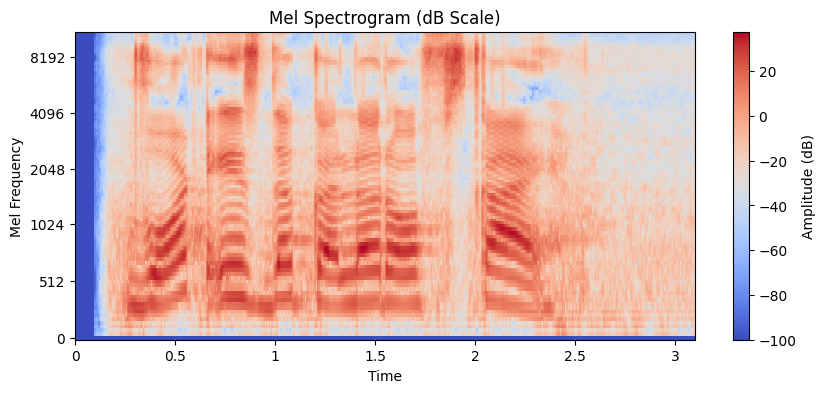

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_spec_db,
    sr=22050,         # Ensure it matches your sample rate
    hop_length=128,   # Ensure it matches your hop length
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(label="Amplitude (dB)")
plt.title("Mel Spectrogram (dB Scale)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

# darker regions = lower energy(quiter parts of sound)
# brighter regions = higher energy(louder parts of sound)

In [ ]:
conv1 = nn.Conv1d(in_channels=100, out_channels=256, kernel_size=3, stride=2, padding=1)
conv2 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, stride=2, padding=1)
relu = nn.ReLU()

# this will create local feature representations

In [ ]:
mel_spec = conv1(mel_spec) # (1, 100, T) = (1, 256, T/2)
mel_spec = relu(mel_spec)
mel_spec = conv2(mel_spec) # (1, 256, T/2) = (1, 512, T/4)
mel_spec = relu(mel_spec)

In [ ]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, dim_feedforward=2048, activation=nn.SiLU())
# each layer in the transformer encoder consists of two main components:
## Multi-head self attention
## Feedforward Network

# Feedforward Network consists of:
## linear layer(expands dimension of the input)
## non-linear activation function(introduces non-linearity)
## linear layer(shrinks the dimension back to original dimension of the input i.e 512)

# d_model specifies the dimension of the input given to the encoder model
# dim_feedforward specifies the dimension to which the input should be scaled to learn complex patterns(hidden layer size)


# why 2048 and not more or less?
# comes from research and experiments:
# acc to "Attention is all you need", 4 * original_dimension works well for NLP and speech tasks

encoder_layer

# this will create global feature representation

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (linear1): Linear(in_features=512, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [ ]:
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=4)

In [ ]:
mel_spec = mel_spec.permute(2, 0, 1)

#reshaping the input shae for transformer from: (batch, features, time) to (time, batch, features)

In [ ]:
latent_representation = transformer_encoder(mel_spec)

In [ ]:
latent_representation = latent_representation.permute(1, 0, 2)

# reshaping back to (batch, time and feature)

In [ ]:
latent_representation

tensor([[[-1.1992,  1.5369, -1.0306,  ...,  0.0130, -2.0504,  0.8059],
         [-0.5621,  1.4516, -0.4417,  ..., -1.0401, -1.0057,  1.7174],
         [-0.0614,  1.5582, -0.6128,  ..., -0.8979, -1.5063,  1.0899],
         ...,
         [-1.3378,  2.1568, -0.9398,  ..., -0.2403, -1.9090,  1.5000],
         [-1.5285,  1.9534, -1.1176,  ..., -0.2729, -1.5295,  1.2862],
         [-1.3118,  1.8326, -1.5675,  ..., -0.8196, -1.9017,  1.9839]],

        [[-0.8524,  1.7680, -1.2698,  ..., -0.5781, -1.9775,  1.0275],
         [-0.6851,  1.3188, -0.8424,  ..., -0.5591, -1.0944,  1.2774],
         [-0.7094,  1.1714, -1.0215,  ..., -0.8394, -0.8253,  1.5766],
         ...,
         [-1.1859,  2.0023, -1.5278,  ...,  0.2148, -1.7581,  1.4710],
         [-1.5501,  2.1073, -1.1080,  ..., -0.0685, -2.0396,  1.4174],
         [-1.0520,  1.7608, -1.1602,  ...,  0.0575, -2.1318,  1.4998]]],
       grad_fn=<PermuteBackward0>)